<a href="https://colab.research.google.com/github/the-black-viper/ml/blob/main/Updated_Javier_EE298_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import matplotlib.pyplot as plt


In [93]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  # Adjust angle rates to fit in the domain [0, 2pi]
  angle_rates = 2*np.pi / np.power(pos, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]
  
  return pos_encoding



In [94]:
# Create a 16x16 Positional Encoding
tokens = 16
dimensions = 16 # Set Dimensions
pos_encoding = positional_encoding(tokens, dimensions)

(1, 16)


In [102]:
# Check for orthogonality
A_pos = pos_encoding[0]
orthogonal = np.dot(A_pos.T, A_pos)
print(orthogonal.round(2))  # The dot product test did not produce an identity matrix therefore it is not orthogonal

[[ 0.   -0.    0.    0.   -0.    0.   -0.   -0.    0.    0.    0.   -0.
  -0.   -0.   -0.   -0.  ]
 [-0.   16.   -0.99  0.34  0.    0.    0.8   0.57  0.   -0.    0.87 -0.45
  -0.   -0.    3.    1.83]
 [ 0.   -0.99  7.63  0.3  -0.    0.45  0.52  0.47  1.73 -2.98  0.91 -0.51
   0.33 -1.15 -0.51 -0.  ]
 [ 0.    0.34  0.3   8.37 -0.    1.3  -0.33  0.05 -2.61 -0.97 -0.37  0.08
  -0.5   0.24 -0.26  0.72]
 [-0.    0.   -0.   -0.    0.   -0.    0.    0.   -0.    0.   -0.    0.
   0.    0.    0.   -0.  ]
 [ 0.    0.    0.45  1.3  -0.   16.   -1.15  1.62  0.    0.    0.28  0.54
   0.   -0.   -0.52  0.86]
 [-0.    0.8   0.52 -0.33  0.   -1.15  7.83 -0.49 -0.69  1.44 -0.72  0.36
  -0.22  0.89  0.42 -0.14]
 [-0.    0.57  0.47  0.05  0.    1.62 -0.49  8.17 -1.28  0.23 -0.5   0.27
  -0.42  0.52 -0.07  0.51]
 [ 0.    0.    1.73 -2.61 -0.    0.   -0.69 -1.28  8.    0.    0.99  0.59
  -0.    0.   -0.3   1.09]
 [ 0.   -0.   -2.98 -0.97  0.    0.    1.44  0.23  0.    8.   -0.09  1.15
   0.    0.   -0.83  

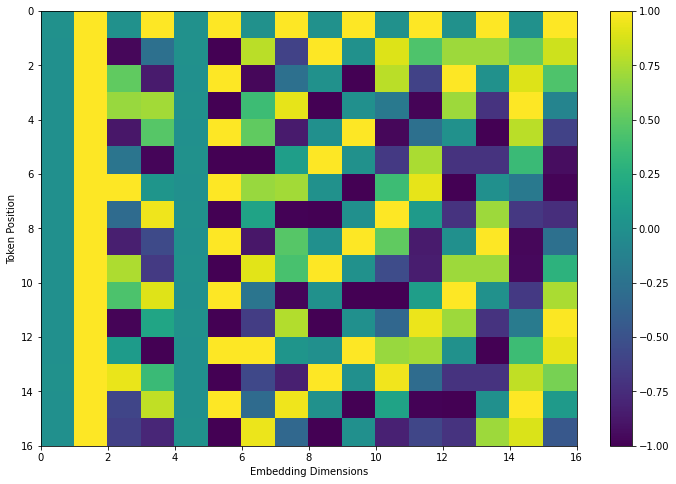

In [105]:
# Plot
plt.figure(figsize=(12,8))
plt.pcolormesh(A_pos, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [98]:
# Modified code from Marius Retegan
def gram_schmidt(A):
    """Orthogonalize a set of vectors stored as the columns of matrix A."""
    # Get the number of vectors (This will be the # of columns(n)).
    m, n = A.shape
    Q =  A.astype(np.float64)
    for j in range(n):
      # To orthogonalize the vector in column j with respect to the
      # previous vectors, subtract from it its projection onto
      # each of the previous vectors.
      for i, k in enumerate(range(j)):
        Q[:, j] -= np.dot(Q[:, k], Q[:, j]) * Q[:, k]
      Q[:, j] = Q[:, j]/np.linalg.norm(Q[:, j])
    return Q

In [114]:
Q = gram_schmidt(A_pos)
W = np.matmul(Q.T, Q) # Sanity check, the resulting matrix is an orthonormal matrix
print(W.round(5))

[[ 1.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0.  0. -0.]
 [ 0.  1.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0.  1.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0.]
 [-0. -0. -0.  0.  1. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.]
 [-0. -0.  0.  0. -0.  1.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0.  1.  0.  0.  0. -0.  0. -0.  0.  0.  0.]
 [-0.  0. -0.  0.  0.  0.  0.  1. -0.  0. -0. -0. -0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0. -0.  0. -0.  1.  0.  0. -0.  0. -0. -0. -0.]
 [ 0.  0.  0. -0.  0. -0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  1.  0. -0.  0.  0. -0.]
 [-0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  1.  0. -0. -0.  0.]
 [-0.  0.  0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  1.  0. -0. -0.]
 [-0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  1.  0. -0.]
 [ 0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  1. 

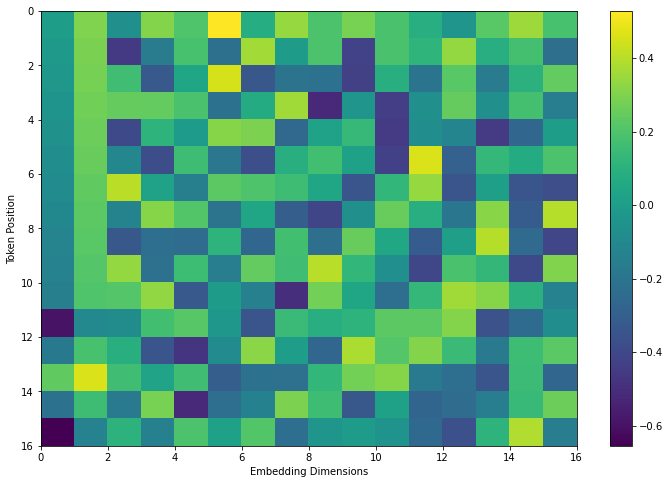

In [111]:
plt.figure(figsize=(12,8))
plt.pcolormesh(Q, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()